<a href="https://colab.research.google.com/github/sovank/learn-linux/blob/main/Day_107_Git_Advance_and_Yaml_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. YAML Validation

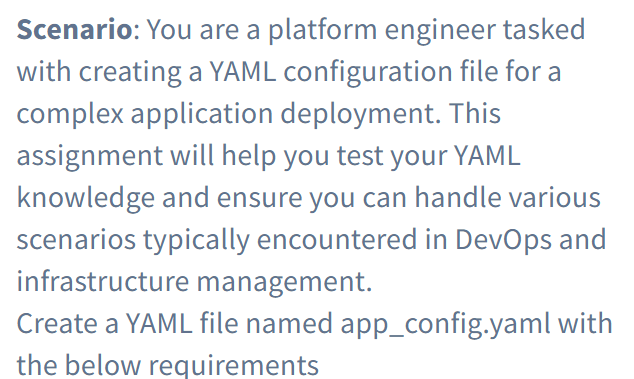

Requirements
Application Metadata:

Define the metadata for the application.
name of application is my-application
version of application is 1.0.0
description should be A sample application deployment configuration
Environment Configuration:

Define configurations for three environments: development, staging, and production.
HINT: Remember Mappings
Each environment should have:
database: The database connection string for that environment.
api_endpoint: The API endpoint for that environment.
env_variables: A list of environment variables, with each variable having a name and value.
Development Environment details
database connection string is dev-db.example.com
api_endpoint is https://dev-api.example.com
Environment variable DEBUG should have value "true"
Staging Environment details
database connection string is staging-db.example.com
api_endpoint is https://staging-api.example.com
Environment variable DEBUG should have value "false"
Production Environment details
database connection string is prod-db.example.com
api_endpoint is https://api.example.com
Environment variable DEBUG should have value "false"
Services Setup:

Define at least two services, web and database.
For each service, include:
image: The Docker image to use for the service.
ports: The ports to expose. Use a mapping of host port to container port.
resources: Services can have multiple resource types. One such type is limits.
Web service details:
image is web-app:latest
ports: 80:80
resources limits should be set as below
cpu to 500m
memory to 256Mi
replicas: Define the number of instances to run. Set this to 3.
strategy: Define the deployment strategy.
The type should be RollingUpdate.
For rollingUpdate, set:
maxUnavailable to 1
maxSurge to 1
Database service details:
image is postgres:13
ports: 5432:5432
resources limits should be set as below
cpu to 250m
memory to 512Mi
volumes: Define a volume with:
name as db-data
Use a persistentVolumeClaim with:
claimName as db-pvc
Volumes Configuration:

Define a persistent volume for the database service named db-data.
Use a persistent volume claim (PVC) to manage the volume. Field name is persistentVolumeClaim
claimName should be db-pvc
Secrets Management:

Define a secret for the database password.
The secret should be of type Opaque and contain a password field with a base64-encoded value of "supersecretpassword".

In [ ]:
apiVersion: v1
kind: Application
metadata:
  name: my-application
  version: 1.0.0
  description: A sample application deployment configuration
environments:
  development:
    database: dev-db.example.com
    api_endpoint: https://dev-api.example.com
    env_variables:
      - name: DEBUG
        value: "true"
  staging:
    database: staging-db.example.com
    api_endpoint: https://staging-api.example.com
    env_variables:
      - name: DEBUG
        value: "false"
  production:
    database: prod-db.example.com
    api_endpoint: https://api.example.com
    env_variables:
      - name: DEBUG
        value: "false"
services:
  web:
    image: web-app:latest
    ports: "80:80"
    resources:
      limits:
        cpu: 500m
        memory: 256Mi
    replicas: 3
    strategy:
      type: RollingUpdate
      rollingUpdate:
        maxUnavailable: 1
        maxSurge: 1
  database:
    image: postgres:13
    ports: "5432:5432"
    resources:
      limits:
        cpu: 250m
        memory: 512Mi
    volumes:
      - name: db-data
        persistentVolumeClaim:
          claimName: db-pvc
volumes:
  - name: db-data
    persistentVolumeClaim:
      claimName: db-pvc
secrets:
  - name: db-password
    type: Opaque
    data:
      password: c3VwZXJzZWNyZXRwYXNzd29yZA== # base64 encoded 'supersecretpassword'